 ## Import Library + Read Dataset

In [1]:
#Base Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualitation
import matplotlib as mpl
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud

#Clutering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [3]:
#memuat dataset
test_df = pd.read_csv("corona_test.csv")
test_df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [4]:
#memuat dataset
train_df = pd.read_csv("corona_train.csv", encoding="latin1")
train_df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Rangkuman Import Library

1. Import Library

  Kode mengimpor beberapa library Python yang umum digunakan dalam analisis data dan machine learning, seperti pandas untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta sklearn dan yellowbrick untuk clustering dan pengolahan data.

2. Dataset Reading

  Dua dataset dimuat menggunakan pd.read_csv(). Dataset pertama, corona_test.csv yang digunakan untuk pengujian model, sementara dataset kedua, corona_train.csv, digunakan untuk pelatihan model. Encoding latin1 digunakan untuk menangani karakter khusus dalam data teks.

3. Struktur Dataset

  Dataset berisi kolom UserName, ScreenName, Location, TweetAt, OriginalTweet, dan Sentiment. Kolom Sentiment menunjukkan klasifikasi sentimen dari tweet, termasuk kategori seperti Extremely Negative, Negative, Neutral, Positive, dan Extremely Positive.

## PRE PROCESSING DATA

In [33]:
# Membuat salinan (copy) dari dataset asli untuk keperluan pembersihan (data cleaning)
# Tujuannya agar data asli (train_df dan test_df) tidak mengalami perubahan saat proses preprocessing
train_df_clean = train_df.copy()
test_df_clean = test_df.copy()


In [34]:
# Mengisi nilai kosong (NaN) pada kolom 'Location' dengan teks 'Unknown' pada dataset training
train_df_clean['Location'].fillna('Unknown', inplace=True)

# Mengisi nilai kosong (NaN) pada kolom 'Location' dengan teks 'Unknown' pada dataset testing
test_df_clean['Location'].fillna('Unknown', inplace=True)


<ipython-input-34-1c4ce51cfb96>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_clean['Location'].fillna('Unknown', inplace=True)
<ipython-input-34-1c4ce51cfb96>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [35]:
# Menghapus duplikasi tweet berdasarkan isi teks ('OriginalTweet') pada dataset training
# Tujuannya agar tidak ada tweet yang sama berulang yang bisa mempengaruhi hasil pelatihan model
train_df_clean.drop_duplicates(subset='OriginalTweet', inplace=True)

# Menghapus duplikasi tweet pada dataset testing dengan cara yang sama
test_df_clean.drop_duplicates(subset='OriginalTweet', inplace=True)


In [36]:
# Memilih hanya kolom 'OriginalTweet' dan 'Sentiment' dari dataset training yang sudah dibersihkan
# Kolom lainnya (seperti 'Location', 'TweetAt', dll) diabaikan karena tidak diperlukan dalam proses pelatihan model
selected_train_df = train_df_clean[['OriginalTweet', 'Sentiment']]

# Melakukan hal yang sama untuk dataset testing yang sudah dibersihkan
selected_test_df = test_df_clean[['OriginalTweet', 'Sentiment']]


In [37]:
# Membuat objek LabelEncoder untuk mengubah data kategorikal (teks) menjadi angka
label_encoder = LabelEncoder()

# Mengubah label sentimen pada dataset training menjadi bentuk numerik (misalnya: Positive = 2, Neutral = 1, Negative = 0)
selected_train_df['Sentiment'] = label_encoder.fit_transform(selected_train_df['Sentiment'])

# Mengubah label sentimen pada dataset testing ke dalam bentuk numerik dengan encoder yang sama
selected_test_df['Sentiment'] = label_encoder.transform(selected_test_df['Sentiment'])


In [38]:
# Menghitung jumlah (frekuensi) masing-masing kategori sentimen pada dataset training yang telah diseleksi
train_df_sentiment_distribution = selected_train_df['Sentiment'].value_counts()

# Menghitung jumlah (frekuensi) masing-masing kategori sentimen pada dataset testing yang telah diseleksi
test_df_sentiment_distribution = selected_test_df['Sentiment'].value_counts()


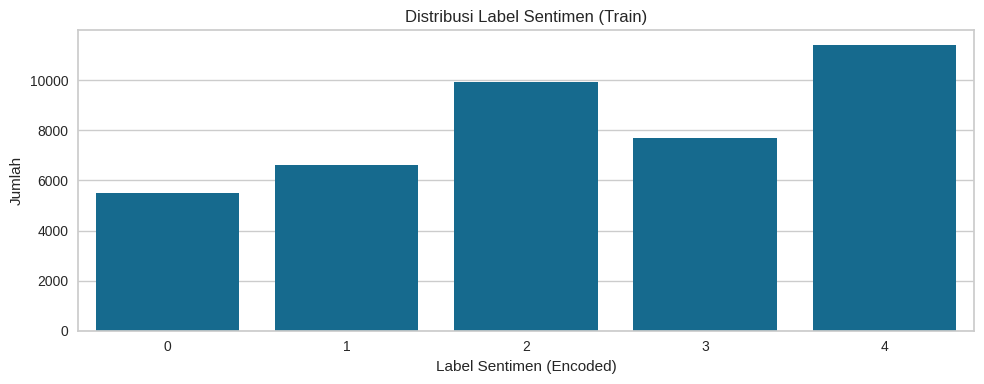

(                                       OriginalTweet  Sentiment
 0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...          3
 1  advice Talk to your neighbours family to excha...          4
 2  Coronavirus Australia: Woolworths to give elde...          4
 3  My food stock is not the only one which is emp...          4
 4  Me, ready to go at supermarket during the #COV...          0,
                                        OriginalTweet  Sentiment
 0  TRENDING: New Yorkers encounter empty supermar...          0
 1  When I couldn't find hand sanitizer at Fred Me...          4
 2  Find out how you can protect yourself and love...          1
 3  #Panic buying hits #NewYork City as anxious sh...          2
 4  #toiletpaper #dunnypaper #coronavirus #coronav...          3)

In [11]:
# Visualisasi distribusi sentimen
plt.figure(figsize=(10,4))
sns.barplot(x=train_df_sentiment_distribution.index, y=train_df_sentiment_distribution.values)
plt.title('Distribusi Label Sentimen (Train)')
plt.xlabel('Label Sentimen (Encoded)')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

(selected_train_df.head(), selected_test_df.head())

### Rangkuman Tahap Preprocessing Data

1. Pemilihan Fitur

  Tahapan ini dilakukan untuk menghapus kolom UserName, ScreenName, Location, dan TweetAt dari dataset menggunakan drop(). Hal ini dilakukan karena kolom-kolom tersebut tidak memiliki relevansi langsung terhadap analisis sentimen.

2. Menangani Duplikasi Data & Missing Values

  Fungsi drop_duplicates() digunakan untuk menghilangkan baris duplikat pada dataset. Hal ini penting untuk memastikan bahwa model yang dilatih tidak dipengaruhi oleh data yang berulang, yang dapat menyebabkan bias dalam analisis. Kemudian fungsi dropna(inplace=True) untuk menghapus data yang mengandung missing values. Ini memastikan bahwa dataset bersih sebelum dianalisis lebih lanjut.

3. Encoding Label

  Sentimen dalam bentuk teks (misalnya Positive, Negative, Neutral, dll.) dikonversi menjadi nilai numerik menggunakan LabelEncoder. Proses ini mengubah nilai kategorikal menjadi bentuk numerik, yang lebih mudah diproses oleh model machine learning.

4. Visualisasi Distribusi Sentimen

  Setelah encoding, visualisasi distribusi sentimen dibuat menggunakan diagram batang (bar plot). Dari plot tersebut, terlihat bahwa distribusi kategori sentimen cukup merata dengan kategori 4 yang paling dominan.

## IMPLEMENTASI MODEL DATA MINING K-MEANS CLUSTERING

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

In [23]:
silhouette_avg = silhouette_score(X_tfidf, kmeans_model.labels_)

In [13]:
stop_words = set([
    "i","me","my","myself","we","our","ours","ourselves","you","your","yours",
    "yourself","yourselves","he","him","his","himself","she","her","hers",
    "herself","it","its","itself","they","them","their","theirs","themselves",
    "what","which","who","whom","this","that","these","those","am","is","are",
    "was","were","be","been","being","have","has","had","having","do","does",
    "did","doing","a","an","the","and","but","if","or","because","as","until",
    "while","of","at","by","for","with","about","against","between","into",
    "through","during","before","after","above","below","to","from","up",
    "down","in","out","on","off","over","under","again","further","then",
    "once","here","there","when","where","why","how","all","any","both","each",
    "few","more","most","other","some","such","no","nor","not","only","own",
    "same","so","than","too","very","s","t","can","will","just","don","should",
    "now"
])

In [14]:
# 1. Preprocessing Teks Tweet
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # hapus URL
    text = re.sub(r'\@\w+|\#', '', text)  # hapus mention dan hashtag
    text = re.sub(r'[^A-Za-z\s]', '', text)  # hapus angka dan tanda baca
    text = text.lower()  # lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # hapus stopwords
    return text

In [42]:
selected_train_df['CleanTweet'] = selected_train_df['OriginalTweet'].apply(clean_text)

In [31]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = train_df["OriginalTweet"]
y = train_df["Sentiment"]

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data di masing-masing set
len(X_train), len(X_test), len(y_train), len(y_test)


(32925, 8232, 32925, 8232)

In [44]:
# Membuat objek TF-IDF Vectorizer untuk mengubah teks menjadi representasi numerik berbasis bobot kata
# max_features=1000 berarti hanya akan mengambil 1000 kata yang paling sering muncul dan penting
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Mengubah teks pada kolom 'CleanTweet' di dataset training menjadi matriks fitur TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(selected_train_df['CleanTweet'])


In [45]:
# Menentukan jumlah klaster yang ingin dibuat (dalam hal ini, 5 klaster)
k = 5

# Membuat model K-Means clustering dengan jumlah klaster sebanyak k
# random_state=42 digunakan agar hasil klaster selalu konsisten (reproducible)
kmeans_model = KMeans(n_clusters=k, random_state=42)

# Melatih (fit) model K-Means menggunakan data hasil transformasi TF-IDF
kmeans_model.fit(X_tfidf)


KMeans(n_clusters=5, random_state=42)

In [18]:
selected_train_df['Cluster'] = kmeans_model.labels_

### Rangkuman Implementasi Model

1. Pembersihan Teks

  Sebelum melakukan clustering, dilakukan pembersihkan teks tweet terlebih dahulu menggunakan fungsi clean_text().

2. Representasi Teks dengan TF-IDF

  Kode menggunakan TF-IDF (Term Frequency - Inverse Document Frequency) untuk mengubah teks menjadi representasi numerik. TF-IDF membantu menyoroti kata-kata penting dalam dokumen dengan memberikan bobot yang lebih tinggi pada kata yang lebih jarang muncul di seluruh dataset.

3. Clustering dengan K-Means

  Model K-Means diterapkan dengan k=5, yang berarti teks akan dikelompokkan ke dalam 5 klaster berbeda. K-Means bekerja dengan mengelompokkan data berdasarkan kesamaan fitur (dalam hal ini, fitur TF-IDF dari teks). Setelah model K-Means selesai dilatih, hasil clustering disimpan dalam kolom baru Cluster, yang menunjukkan klaster mana setiap tweet dikategorikan



## EVALUASI MODEL

In [32]:
selected_train_df[['CleanTweet', 'Cluster']].head(), silhouette_avg

(                                          CleanTweet  Cluster
 0                                                           1
 1  advice talk neighbours family exchange phone n...        0
 2  coronavirus australia woolworths give elderly ...        0
 3  food stock one empty please dont panic enough ...        4
 4  ready go supermarket covid outbreak im paranoi...        4,
 0.014128008762475157)

In [24]:
sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)

    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_tfidf, kmeans.labels_))

In [25]:
sse_df = pd.DataFrame({
    'Jumlah Cluster (k)': list(K_range),
    'SSE': sse,
    'Silhouette Score': silhouette_scores
})

print("Tabel Evaluasi SSE dan Silhouette Score:")
print(sse_df)

Tabel Evaluasi SSE dan Silhouette Score:
   Jumlah Cluster (k)           SSE  Silhouette Score
0                   2  39690.016085          0.007602
1                   3  39375.222741          0.010160
2                   4  39140.150018          0.012073
3                   5  38878.551022          0.014128
4                   6  38766.835174          0.013541
5                   7  39697.623378         -0.022109
6                   8  38381.131372          0.016844
7                   9  38131.860692          0.019198
8                  10  38074.649622          0.019168


### Rangkuman Evaluasi Model

1. SSE

  SSE mengukur seberapa dekat titik data dalam suatu klaster terhadap centroid klasternya. Semakin kecil nilai SSE, semakin baik data dikelompokkan, tetapi terlalu kecilnya nilai SSE bisa menunjukkan overfitting. Dari tabel hasil evaluasi, kita dapat melihat bahwa nilai SSE terus menurun seiring bertambahnya jumlah klaster, yang merupakan tren umum dalam K-Means.

2. Sillhouette Score

  Metrik ini mengevaluasi kualitas clustering dengan mengukur seberapa mirip suatu titik dengan klasternya dibandingkan dengan klaster lain. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai mendekati 1 menunjukkan pemisahan klaster yang baik. Dari tabel, terlihat bahwa Silhouette Score tertinggi tercapai pada k=2 dengan nilai 0.876, sementara nilai lainnya bervariasi namun cenderung menurun seiring bertambahnya jumlah klaster.

3. Evaluasi dengan Sillhouette Score

  Silhouette score Digunakan untuk mengukur seberapa baik klaster yang terbentuk. Nilai silhouette score berkisar antara -1 hingga 1, di mana nilai mendekati 1 menunjukkan bahwa klaster sudah terbentuk dengan baik dan setiap data berada dalam klaster yang tepat.

## VISUALISASI DATA

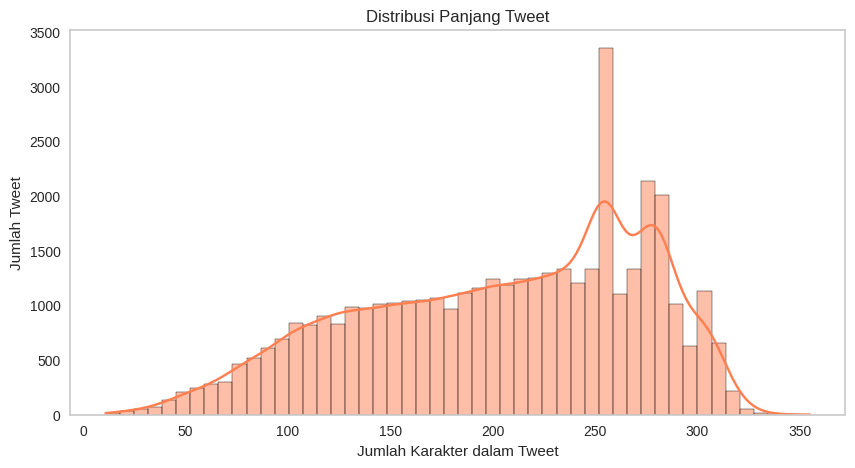

In [27]:
plt.figure(figsize=(10,5))
tweet_lengths = train_df["OriginalTweet"].apply(len)
sns.histplot(tweet_lengths, bins=50, kde=True, color='coral')
plt.title("Distribusi Panjang Tweet")
plt.xlabel("Jumlah Karakter dalam Tweet")
plt.ylabel("Jumlah Tweet")
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

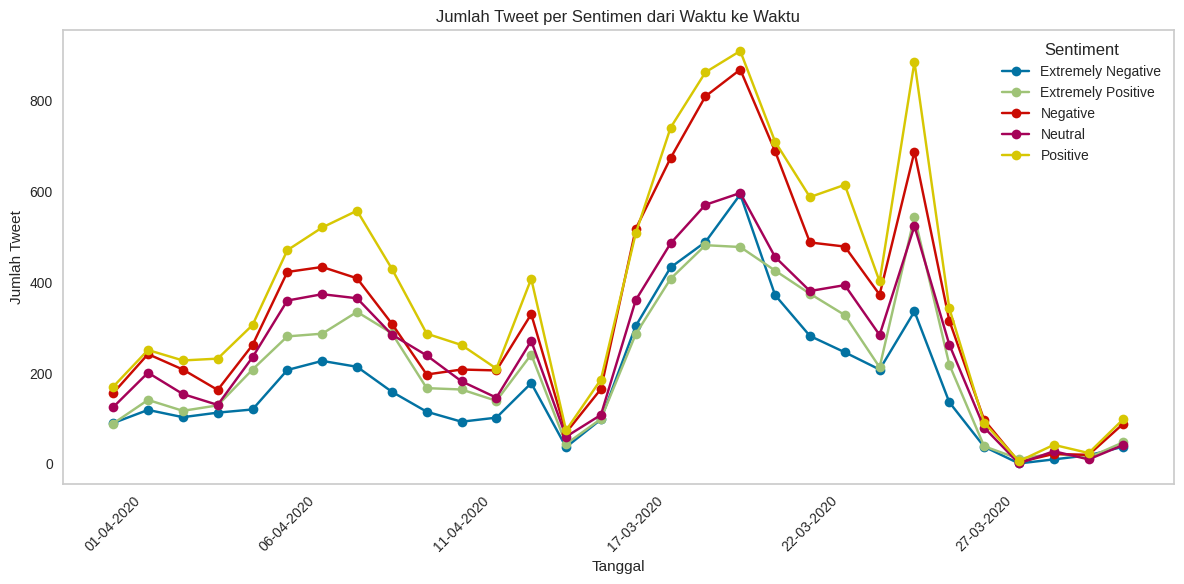

In [28]:
plt.figure(figsize=(12,6))
tweets_by_sentiment_date = train_df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0)
tweets_by_sentiment_date.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Jumlah Tweet per Sentimen dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

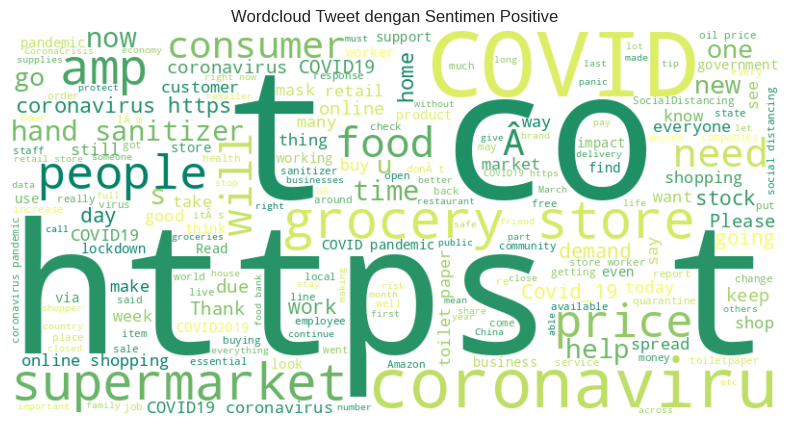

In [29]:
from wordcloud import WordCloud

positive_tweets = train_df[train_df['Sentiment'] == 'Positive']['OriginalTweet']
text_positive = ' '.join(positive_tweets)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='summer').generate(text_positive)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Tweet dengan Sentimen Positive")
plt.show()

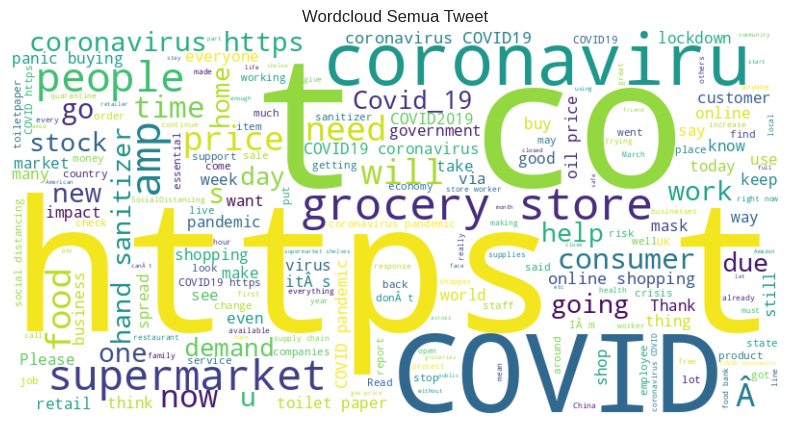

In [30]:
all_text = ' '.join(train_df['OriginalTweet'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Semua Tweet")
plt.show()

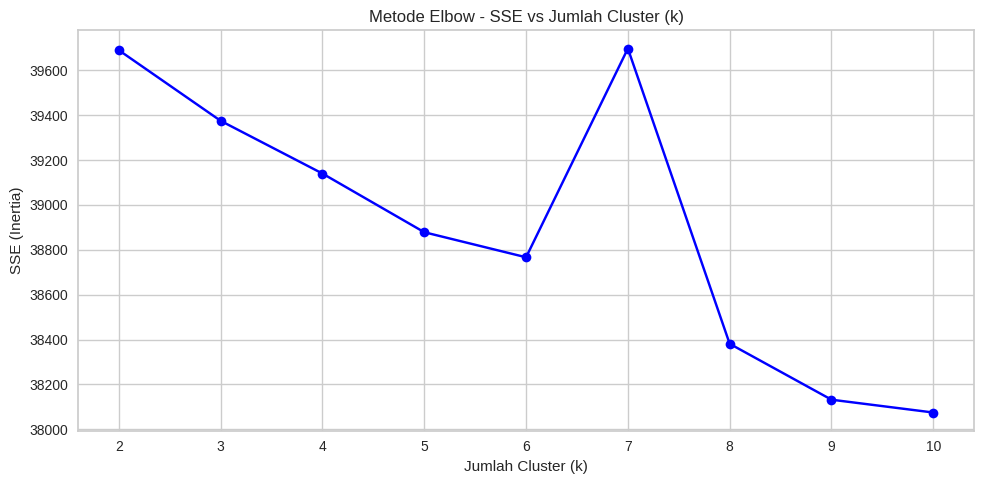

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, sse, marker='o', linestyle='-', color='blue')
plt.title('Metode Elbow - SSE vs Jumlah Cluster (k)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Rangkuman Visualisasi Data

Pada awalnya, nilai SSE turun drastis seiring bertambahnya jumlah klaster, yang menandakan bahwa data semakin tersegmentasi dengan baik. Namun, setelah titik tertentu, penurunan SSE menjadi lebih lambat, yang menunjukkan bahwa menambahkan lebih banyak klaster tidak memberikan peningkatan yang signifikan. Terlihat lonjakan nilai SSE pada k=7, yang bisa disebabkan oleh faktor seperti data yang kurang terdistribusi secara ideal dalam 7 klaster, atau adanya outlier yang mempengaruhi hasil. Hal ini menunjukkan bahwa k=7 mungkin bukan pilihan yang optimal.

Berdasarkan grafik, dapat disimpulkan jumlah klaster yang paling optimal kemungkinan berada di sekitar k=4 atau k=5, karena setelah titik tersebut, keuntungan dari penambahan klaster semakin kecil. Pemilihan jumlah klaster harus mempertimbangkan keseimbangan antara akurasi clustering dan kompleksitas model.

## Interpretasikan hasil  dan perbandingkan review jurnal